<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [310]:
import pandas as pd
import psycopg2


In [312]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)


# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [313]:
query_3_1 = f'''
    select  count(*)
    from vacancies
    '''



In [314]:
df = pd.read_sql_query(query_3_1, connection)
df

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [315]:
query_3_2 = f'''
    select  count(*)
    from EMPLOYERS
    '''

In [316]:
df = pd.read_sql_query(query_3_2, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [317]:
query_3_3 = f'''
    select  count(*)
    from AREAS
    '''


In [318]:
df = pd.read_sql_query(query_3_3, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [319]:
query_3_4 = f'''
    select  count(*)
    from INDUSTRIES
    '''

In [320]:
df = pd.read_sql_query(query_3_4, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,count
0,294


***

Вывод:  
В датасете представленны 49197 вакансий, 23501 работодатель, 1362 региона, 294 сферы деятельности. Наибольше колличество данных представленнро в базе "vacancies". Данную таблицу будем считать основной.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [321]:
query_4_1 = f'''
    select  
        a.name as area_name,
        count(v.id) as quantity
    from vacancies as v
    join areas as a on a.id = v.area_id
    group by a.name
    order by quantity desc
    limit 10
    '''

In [322]:
df_vacancies_by_cities = pd.read_sql_query(query_4_1, connection)
df_vacancies_by_cities

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area_name,quantity
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [323]:
query_4_2 = f'''
    select 
    (select count(*) from vacancies where salary_from is not null or salary_to is not null) as not_null_salary_count,
    (select count(*) from vacancies where salary_from is null and salary_to is null) as null_salary_count
    '''

In [324]:
df = pd.read_sql_query(query_4_2, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,not_null_salary_count,null_salary_count
0,24073,25124


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [325]:
query_4_3 = f'''
    select  
        round(avg(v.salary_from)) as avg_min_salary,
        round(avg(v.salary_to)) as avg_max_salary
    from vacancies as v
    '''

In [326]:
df = pd.read_sql_query(query_4_3, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,avg_min_salary,avg_max_salary
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [327]:
query_4_4 = f'''
    select  
        schedule,
        employment,
        count(v.id) as quantity
    from vacancies as v
    group by schedule, employment
    order by quantity desc
    '''

In [328]:
df_employment_type  = pd.read_sql_query(query_4_4, connection)
df_employment_type

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,schedule,employment,quantity
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [329]:
query_4_5 = f'''
    select  
        experience,
        count(v.id) as quantity
    from vacancies as v
    group by experience
    order by quantity asc
    limit 10
    '''

In [330]:
df_experience = pd.read_sql_query(query_4_5, connection)
df_experience

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,experience,quantity
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

Вывод:  
1. Наибольшее колличество вакансий в Москве, Санкт-Петербурге и Минске.
2. В баззе данных в половине вакансий не указана желаемая ЗП. Это необходимо учитывать при дальнейшей работе с датасетом.
3. Средняя ЗП варьируется от 71000 до 110000.
4. Подавляющее колличество соискателей ищет работу на полный день с полной занятостью.
5. Подавляющее колличество соискателей имеет опыт работы от 1 года до 3 лет.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [331]:
query_5_1 = f'''
    select  
        e.name as employer,
        count(v.id) as quantity
    from vacancies as v
    join employers as e on e.id = v.employer_id
    group by employer
    order by quantity desc
    limit 10
    '''

In [332]:
df = pd.read_sql_query(query_5_1, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,employer,quantity
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
5,ИК СИБИНТЕК,327
6,МТС,292
7,DataArt,247
8,Совкомбанк Технологии,204
9,Первый Бит,176


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [333]:
query_5_2 = f'''
    select
        a.name as area,
        count(distinct e.id) as employers,
        count(distinct v.id) as vacancies
    from areas as a
    left join employers as e on e.area = a.id
    left join vacancies as v on a.id = v.area_id
    where v.id is null
    group by a.name
    order by 2 desc
    limit 10
    '''


In [334]:
df = pd.read_sql_query(query_5_2, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,area,employers,vacancies
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
5,Ростовская область,18,0
6,Азербайджан,17,0
7,Нижегородская область,16,0
8,Республика Татарстан,16,0
9,Узбекистан,15,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [335]:
query_5_3 = f'''
    select
        e.name as employer,
        count(distinct v.area_id) areas
    from vacancies as v
    join employers as e on v.employer_id = e.id
    group by e.name
    order by 2 desc
    limit 10
    '''

In [336]:
df = pd.read_sql_query(query_5_3, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,employer,areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,Почта России,48
9,КРОН,48


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [337]:
query_5_4 = f'''
    select
        count(e.id) as quantity_of_employers
    from employers as e
    left join employers_industries as ei on ei.employer_id = e.id
    where ei.industry_id is null
    '''

In [338]:
df = pd.read_sql_query(query_5_4, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,quantity_of_employers
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [339]:
query_5_5 = f'''
    select
        e.name as company,
        count(ei.industry_id) as quantity_of_employers
    from employers as e
    left join employers_industries as ei on ei.employer_id = e.id
    group by e.name
    having count(ei.industry_id) = 4
    order by 1
    limit 10
    '''

In [340]:
df = pd.read_sql_query(query_5_5, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,company,quantity_of_employers
0,101 Интернет,4
1,21vek.by,4
2,2ГИС,4
3,2К,4
4,4 пикселя +,4
5,5lb,4
6,5 Армия,4
7,741 Studios,4
8,AAEngineering Group,4
9,ADAPTER,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [341]:
query_5_6 = f'''
    select
        count(e.id) as quantity_of_employers_it
    from employers as e
    left join employers_industries as ei on ei.employer_id = e.id
    left join industries as i on i.id = ei.industry_id
    where i.name like 'Разработка программного обеспечения'
    '''

In [342]:
df = pd.read_sql_query(query_5_6, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,quantity_of_employers_it
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [343]:
import requests
from bs4 import BeautifulSoup

url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', {'class': 'standard sortable'})
table_html = table.prettify()
df_cities_list = pd.read_html(table_html)
df_cities = df_cities_list[0]
cities = tuple(df_cities['Город'])
cities

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Красноярск',
 'Челябинск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [344]:
query_5_7 = f'''
    select
        a.name as city,
        count(v.id) as vacancies
    from vacancies as v
    join employers as e on e.id = v.employer_id
    join areas as a on a.id = v.area_id
    where e.name = 'Яндекс' and a.name in {cities}
    group by city
    union all
    select 
        'Total' as city,
        count(v.id) as vacancies
    from vacancies as v
    join employers as e on e.id = v.employer_id
    join areas as a on a.id = v.area_id
    where e.name = 'Яндекс' and a.name in {cities}
    order by 2 desc
    '''

In [345]:
df = pd.read_sql_query(query_5_7, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,city,vacancies
0,Total,485
1,Москва,54
2,Санкт-Петербург,42
3,Екатеринбург,39
4,Нижний Новгород,36
5,Новосибирск,35
6,Воронеж,32
7,Краснодар,30
8,Самара,26
9,Уфа,26


***

Выводы:  
1. Наибольшее колличество вакансий представленно от IT и Fintech компаний.
2. В выборке достаточно много регионов, в которых не представленно вакансий, и при этом достаточно большое кол-во работодателей.
3. Крупные работодатели имеют вокансии во множестве регионов.
4. 8419 работодателей, у которых не указана сфера деятельности.
5. Часть компаний-работодателей имеет больше чем 1 сфер деятельности.
6. В датасете представлено 3553 IT-компаний.
7. Отдельно разобрали компанию Яндекс, так как она является наиболее крупным работодателем.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [346]:
query_6_1 = f'''
    select
        count(id) as quantity_of_vacancies
    from vacancies
    where lower(name) LIKE '%data%' OR lower(name) LIKE '%данн%'
    '''

In [347]:
df = pd.read_sql_query(query_6_1, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,quantity_of_vacancies
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [348]:
query_6_2 = f'''
    select count(id) as junior_DS_vacancies
    from vacancies
    where 
        (
            lower(name) like '%data scientist%'
            or lower(name) like '%data science%'
            or lower(name) like '%исследователь данных%'
            or (name like '%ML%' and lower(name) not like '%html%')
            or lower(name) like '%machine learning%'
            or lower(name) like '%машинн%обучен%'
        )
        and (
            lower(name) like '%junior%'
            or experience = 'Нет опыта'
            or employment = 'Cтажировка'
        )
    '''


In [349]:
df = pd.read_sql_query(query_6_2, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,junior_ds_vacancies
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [350]:
query_6_3 = f'''
    select count(id) as vacancies_with_SQL
    from vacancies
    where 
        (
            lower(name) like '%data scientist%'
            or lower(name) like '%data science%'
            or lower(name) like '%исследователь данных%'
            or (name like '%ML%' and lower(name) not like '%html%')
            or lower(name) like '%machine learning%'
            or lower(name) like '%машинн%обучен%'
        )
        and (
            key_skills like '%SQL%'
            or employment = '%postgres%'
        )
    '''

In [351]:
df = pd.read_sql_query(query_6_3, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,vacancies_with_sql
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [352]:
query_6_4 = f'''
    select count(id) as vacancies_with_Python
    from vacancies
    where 
        (
            lower(name) like '%data scientist%'
            or lower(name) like '%data science%'
            or lower(name) like '%исследователь данных%'
            or (name like '%ML%' and lower(name) not like '%html%')
            or lower(name) like '%machine learning%'
            or lower(name) like '%машинн%обучен%'
        )
        and (
            key_skills like '%Python%'
        )
    '''

In [353]:
df = pd.read_sql_query(query_6_4, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,vacancies_with_python
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [354]:
query_6_5 = f'''
    select round(avg(length(key_skills) - length(replace(key_skills, '\t', '')) + 1), 2) as average_skills
    from vacancies
    where 
        lower(name) like '%data scientist%'
        or lower(name) like '%data science%'
        or lower(name) like '%исследователь данных%'
        or (name like '%ML%' and lower(name) not like '%html%')
        or lower(name) like '%machine learning%'
        or lower(name) like '%машинн%обучен%'
    '''

In [355]:
df = pd.read_sql_query(query_6_5, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,average_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [356]:
query_6_6 = f'''
    select 
        experience,
        round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to))) as average_salary
    from vacancies
    where
        (
            lower(name) like '%data scientist%'
            or lower(name) like '%data science%'
            or lower(name) like '%исследователь данных%'
            or (name like '%ML%' and lower(name) not like '%html%')
            or lower(name) like '%machine learning%'
            or lower(name) like '%машинн%обучен%'
        )
        and (
            salary_from is not null or salary_to is not null
        )
    group by experience
    order by experience asc
        
    '''

In [357]:
df = pd.read_sql_query(query_6_6, connection)
df

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,experience,average_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

Вывод:  
1. В датасете предствленна 1771 вакансия имеющая отношение к работе с данными.
2. В датасете предствленна 51 вакансия для начинающего инжинера Data Science (не так уж и много).
3. Далеко не во всех вакансиях DS необходимо знание SQL и postgres.
4. Также не в всегда для работы DS необходимо знание Phyton.
5. Для вакансий DS указывается в среднем примерно 6 ключевых навыков.
6. Средняя ЗП для инжинера DS в странах СНГ и России примерно равна 150000 руб. Придется пройти достаточно длинный путь, чтобы зарабатывать более-менее большие деньги.

# Общий вывод по проекту

Анализ датасета позволил получить ценную информацию о вакансиях и рынке труда в области Data Science. В датасете содержится информация о 49197 вакансиях от 23501 работодателя в 1362 регионах и в 294 сферах деятельности. Источник данных для проекта - project_sql от Skill Factory.

Из проведенного анализа выяснилось следующее:

- Наибольшее количество вакансий представлено в Москве, Санкт-Петербурге и Минске.
- Приблизительно половина вакансий не содержит информации о желаемой заработной плате.
- Средний уровень заработной платы варьируется от 71000 до 110000 рублей.
- Большинство соискателей ищут работу на полный рабочий день с полной занятостью.
- Большинство соискателей имеют опыт работы от 1 года до 3 лет.
- IT-компании и компании из сферы Fintech представлены наибольшим числом вакансий.
- В датасете есть регионы, где количество вакансий невелико, несмотря на наличие большого числа работодателей.
- Некоторые крупные работодатели имеют вакансии во множестве регионов.
- Существует 8419 работодателей, у которых не указана сфера деятельности.
- Некоторые работодатели имеют более одной сферы деятельности.
- В датасете представлены 3553 IT-компании.
- Компания Яндекс является наиболее крупным работодателем с большим числом вакансий.
- В датасете представлено 1771 вакансия, связанная с работой с данными.
- Количество вакансий для начинающих инженеров Data Science составляет всего 51, что говорит о высокой конкуренции для начинающих инженеров Data Science.
- Знание SQL и PostgreSQL не всегда требуется для вакансий Data Science.
- Аналогично, знание Python не всегда является обязательным для работы в области Data Science.
- В среднем для вакансий Data Science указывается около 6 ключевых навыков.
- Средняя заработная плата для инженеров Data Science составляет примерно 180000 рублей, что выше чем общая средняя ЗП по рынку вакансий России и стран СНГ.

Таким образом, анализ датасета предоставил ценную информацию о рынке труда в области Data Science, позволяя лучше понять требования работодателей, уровень заработной платы и основные навыки, необходимые для успешной карьеры в данной области. Эти выводы могут быть полезны для соискателей, работодателей и всех заинтересованных сторон, ориентирующихся на рынок труда в области Data Science.

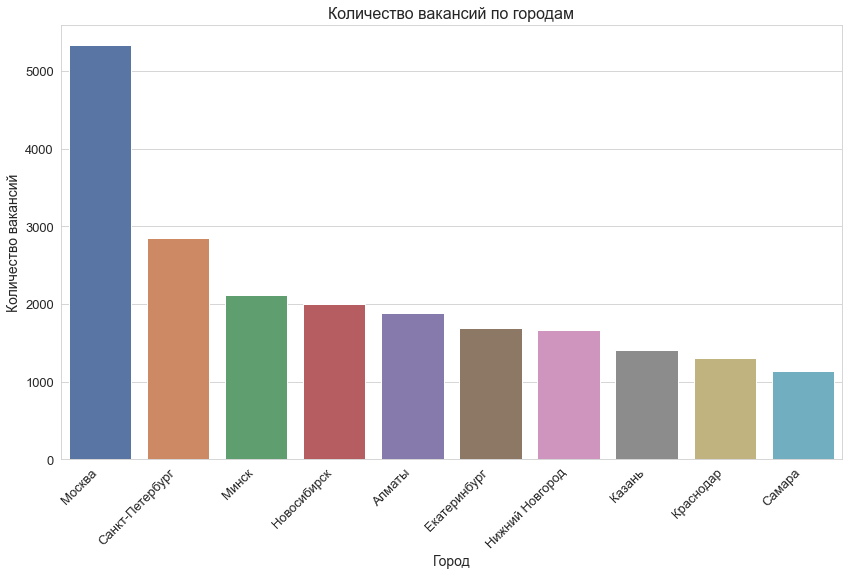

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x='area_name', y='quantity', data=df_vacancies_by_cities)
sns.set_palette('deep')
sns.set_style('whitegrid')
ax.set_xlabel('Город', fontsize=14)
ax.set_ylabel('Количество вакансий', fontsize=14)
ax.set_title('Количество вакансий по городам', fontsize=16)
plt.xticks(rotation=45, ha='right')
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)

plt.show()


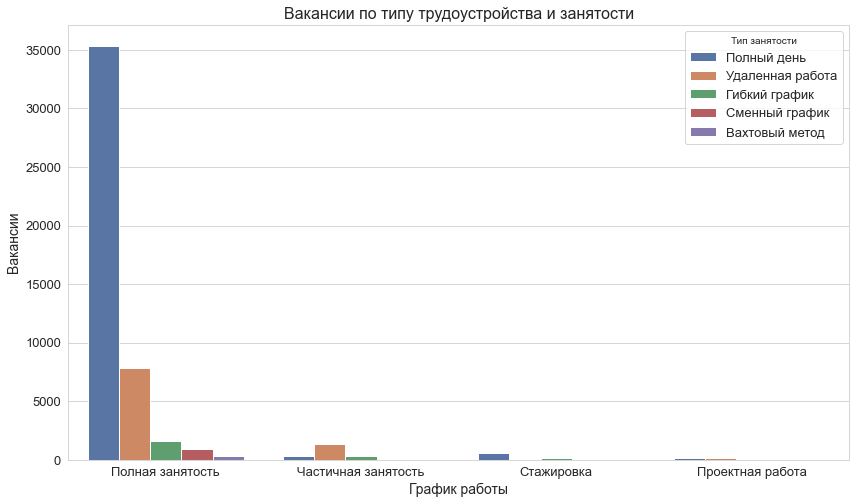

In [359]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df_employment_type, x='employment', y='quantity', hue='schedule', ci=None)
sns.set_palette('deep')
plt.xlabel('График работы', fontsize=14)
plt.ylabel('Вакансии', fontsize=14)
plt.title('Вакансии по типу трудоустройства и занятости', fontsize=16)
plt.legend(title='Тип занятости', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()


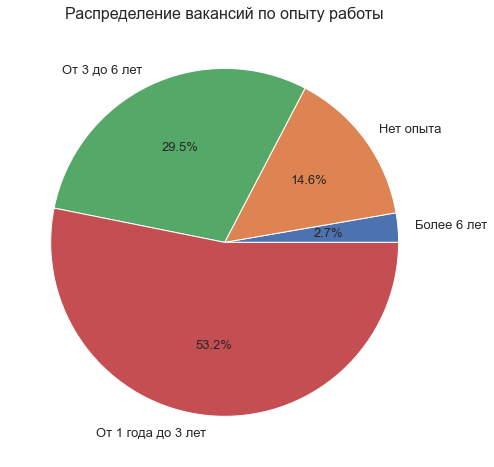

In [378]:

import numpy as np

plt.figure(figsize=(8, 8))
plt.pie(df_experience['quantity'], labels=df_experience['experience'], autopct='%1.1f%%', textprops={'fontsize': 13})
plt.title('Распределение вакансий по опыту работы', fontsize=16)
colors = plt.cm.tab20(np.linspace(0, 1, len(df_experience)))
plt.gca().set_prop_cycle('color', colors)

plt.show()


In [372]:
query_6_7 = f'''
    select 
        'Data Science' as vacancy,
        round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to))) as average_salary
    from vacancies
    where
        (
            lower(name) like '%data scientist%'
            or lower(name) like '%data science%'
            or lower(name) like '%исследователь данных%'
            or (name like '%ML%' and lower(name) not like '%html%')
            or lower(name) like '%machine learning%'
            or lower(name) like '%машинн%обучен%'
        )
        and (
            salary_from is not null or salary_to is not null
        )
    union all
    select 
        'Остальные вакансии' as vacancy,
        round(avg(coalesce((salary_from + salary_to) / 2, salary_from, salary_to))) as average_salary
    from vacancies
    where
        (
            lower(name) not like '%data scientist%'
            or lower(name) not like '%data science%'
            or lower(name) not like '%исследователь данных%'
            or (name not like '%ML%' and lower(name) not like '%html%')
            or lower(name) not like '%machine learning%'
            or lower(name) not like '%машинн%обучен%'
        )
        and (
            salary_from is not null or salary_to is not null
        )
    group by vacancy
        
    '''
    
df_salary_comparison = pd.read_sql_query(query_6_7, connection)
df_salary_comparison

c:\Users\segag\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,vacancy,average_salary
0,Data Science,177379.0
1,Остальные вакансии,84315.0


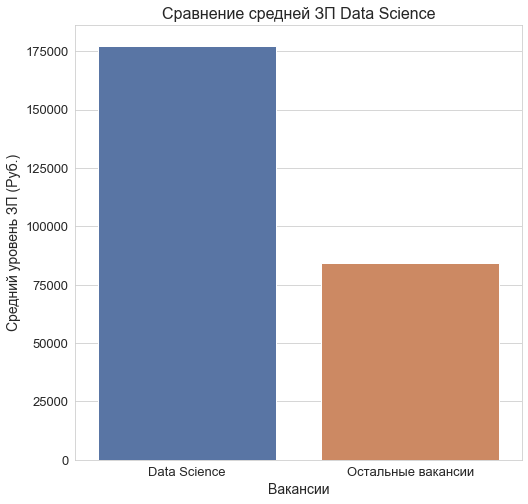

In [376]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x='vacancy', y='average_salary', data=df_salary_comparison)
sns.set_palette('deep')
sns.set_style('whitegrid')
ax.set_xlabel('Вакансии', fontsize=14)
ax.set_ylabel('Средний уровень ЗП (Руб.)', fontsize=14)
ax.set_title('Сравнение средней ЗП Data Science', fontsize=16)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)

plt.show()
